In [9]:
## Install and import packages
# Darts: https://unit8co.github.io/darts/README.html
!pip install darts
!pip install dask[dataframe]

from google.colab import drive
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import time

from darts.timeseries import TimeSeries
from darts.models import NaiveMean, NaiveSeasonal, NaiveDrift, NaiveMovingAverage, LinearRegressionModel, VARIMA
from darts.models import RandomForest, LightGBMModel, XGBModel, RNNModel, BlockRNNModel
from darts.models import NBEATSModel, NHiTSModel, TCNModel, TransformerModel, DLinearModel, NLinearModel, TiDEModel, TSMixerModel
from darts.utils.timeseries_generation import holidays_timeseries, datetime_attribute_timeseries

In [10]:
## Load data and preprocess
drive.mount('/content/drive')
path = '/content/drive/My Drive/deep learning project summer 2024/data'
df = pd.read_csv(os.path.join(path, 'bangladesh_dengue_epidemic_monthly_cases_and_climate_datadata.csv'))

# Extract date from month and year
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))
df = df.drop(columns=['month', 'year', 'epidemic'])

cols = df.columns.tolist()
j = cols.index('date')
# Move date to first
cols = cols[j:j+1] + cols[:j] + cols[j+1:]
i = cols.index('case')
# Move case to last
cols = cols[:i] + cols[i+1:] + cols[i:i+1]
df = df[cols]

# df.to_csv(os.path.join(path, 'cases.csv'), index=False)

df = df.drop(columns=['pop'])

df.head()


## Parameters and training data
horizon = 30
frac_train = 0.8

series = TimeSeries.from_dataframe(df, time_col='date')
train, test = series.split_before(frac_train)
target = train['case']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


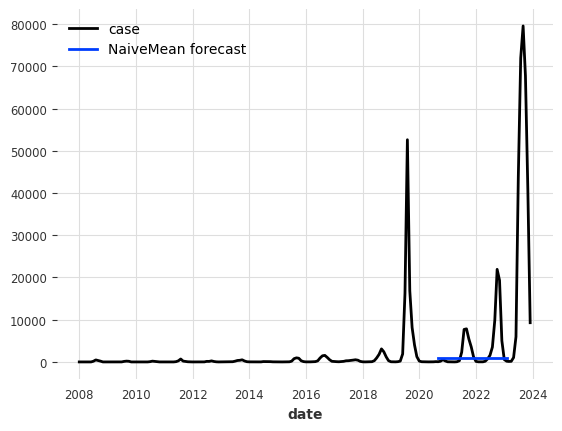

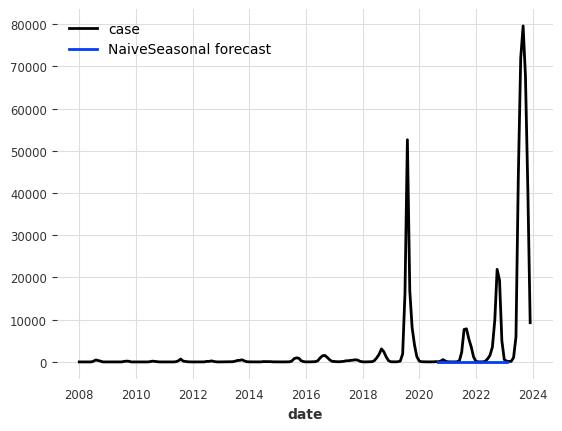

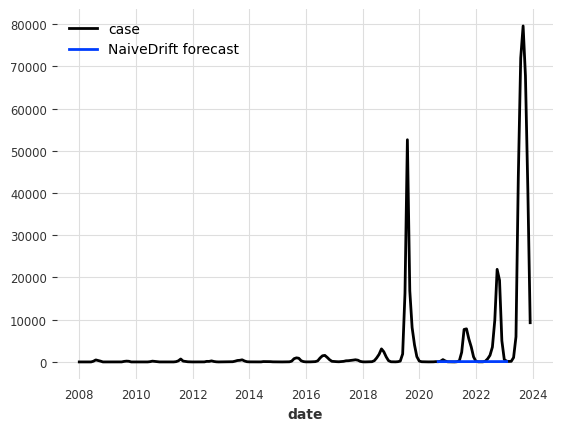

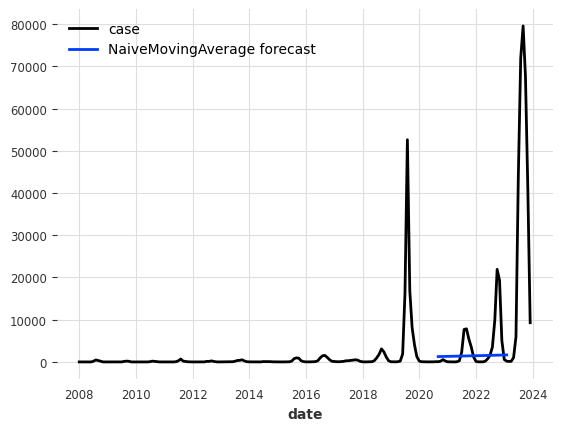

In [8]:
## NaiveMean
pred_NaiveMean = NaiveMean().fit(train).predict(horizon)
plt.figure()
series['case'].plot()
pred_NaiveMean['case'].plot(label="NaiveMean forecast", low_quantile=0.10, high_quantile=0.90)
plt.legend()

## NaiveSeasonal
pred_NaiveSeasonal = NaiveSeasonal().fit(train).predict(horizon)
plt.figure()
series['case'].plot()
pred_NaiveSeasonal['case'].plot(label="NaiveSeasonal forecast", low_quantile=0.10, high_quantile=0.90)
plt.legend()

## NaiveDrift
pred_NaiveDrift = NaiveDrift().fit(train).predict(horizon)
plt.figure()
series['case'].plot()
pred_NaiveDrift['case'].plot(label="NaiveDrift forecast", low_quantile=0.10, high_quantile=0.90)
plt.legend()

## NaiveMovingAverage
pred_NaiveMovingAverage = NaiveMovingAverage(input_chunk_length=100).fit(train).predict(horizon)
plt.figure()
series['case'].plot()
pred_NaiveMovingAverage['case'].plot(label="NaiveMovingAverage forecast", low_quantile=0.10, high_quantile=0.90)
plt.legend()

# ## LinearRegressionModel
# target = train['case']
# pred_LinearRegressionModel = LinearRegressionModel(lags=100, output_chunk_length=horizon).fit(target).predict(horizon)
# plt.figure()
# series['case'].plot()
# pred_LinearRegressionModel['case'].plot(label="LinearRegressionModel forecast", low_quantile=0.10, high_quantile=0.90)
# plt.legend()

# ## VARIMA
# pred_VARIMA = VARIMA(trend="n").fit(train).predict(horizon)
# plt.figure()
# series['case'].plot()
# pred_VARIMA['case'].plot(label="VARIMA forecast", low_quantile=0.10, high_quantile=0.90)
# plt.legend()

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | RNN              | 700    | train
6 | V               | Linear           | 26     | train
-------------------------------------------------------------
726       Trainable params
0         Non-trainable p

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.8 K  | train
6 | V               | Linear           | 26     | train
-------------------------------------------------------------
2.8 K     Trainable params
0         Non-trainable p

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | GRU              | 2.1 K  | train
6 | V               | Linear           | 26     | train
-------------------------------------------------------------
2.1 K     Trainable params
0         Non-trainable p

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | RNN              | 2.0 K  | train
6 | fc              | Sequential       | 156    | train
-------------------------------------------------------------
2.2 K     Trainable params
0         Non-trainable p

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

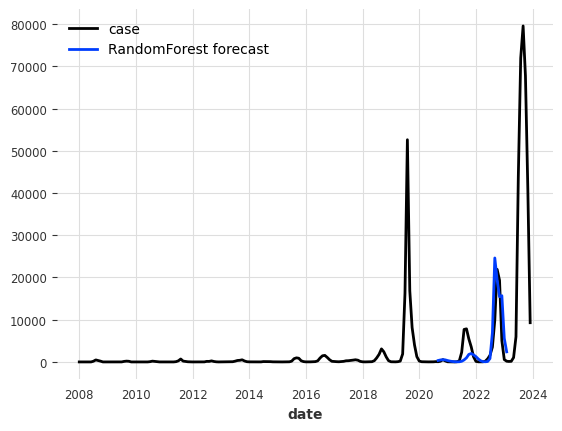

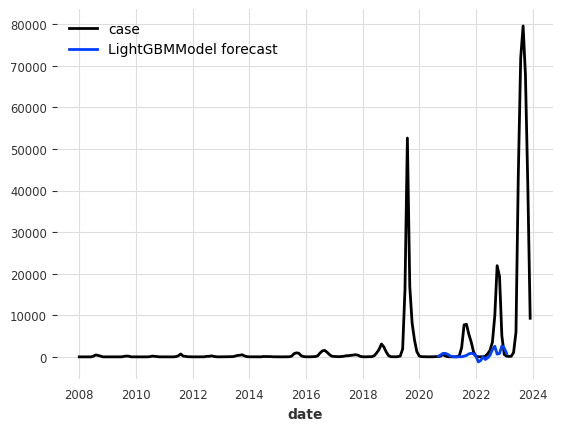

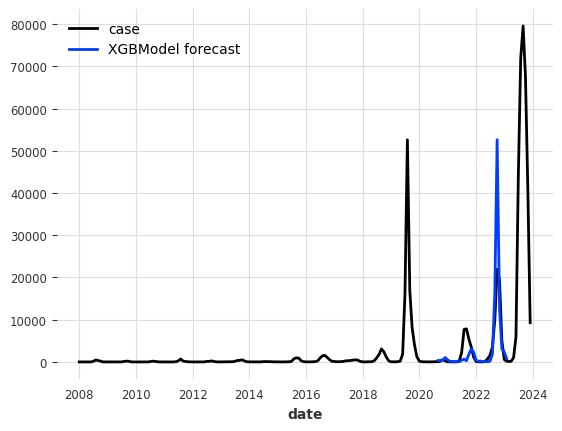

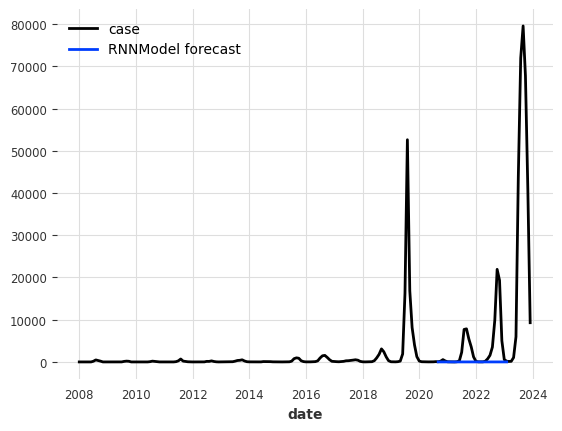

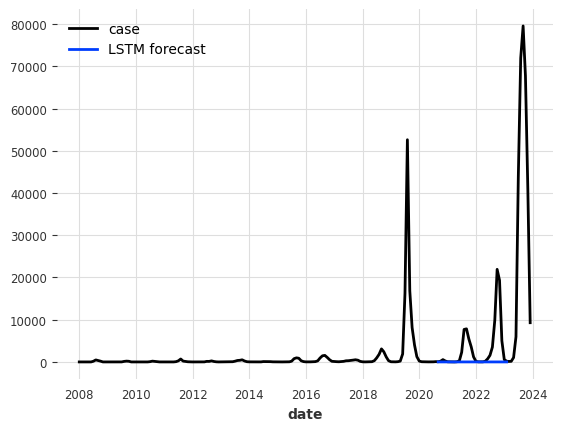

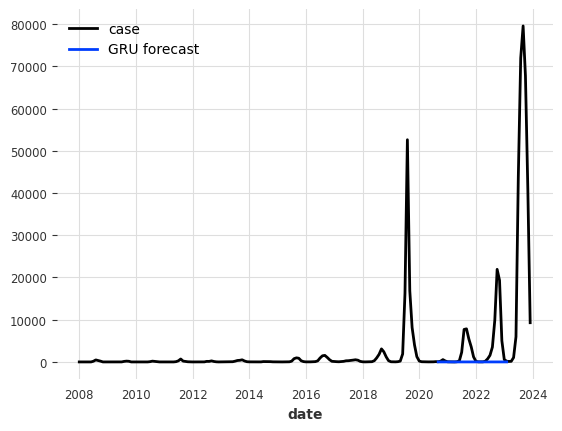

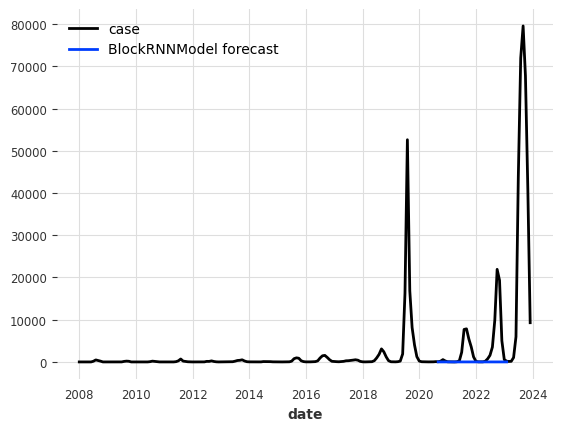

In [11]:
## RandomForest
pred_RandomForest = RandomForest(lags=10, output_chunk_length=horizon, n_estimators=10, criterion='squared_error').fit(target).predict(horizon)
plt.figure()
series['case'].plot()
pred_RandomForest['case'].plot(label="RandomForest forecast", low_quantile=0.10, high_quantile=0.90)
plt.legend()

## LightGBMModel
pred_LightGBMModel = LightGBMModel(lags=10, output_chunk_length=horizon, verbose=-1).fit(target).predict(horizon)
plt.figure()
series['case'].plot()
pred_LightGBMModel['case'].plot(label="LightGBMModel forecast", low_quantile=0.10, high_quantile=0.90)
plt.legend()

## XGBModel
pred_XGBModel = XGBModel(lags=10, output_chunk_length=horizon).fit(target).predict(horizon)
plt.figure()
series['case'].plot()
pred_XGBModel['case'].plot(label="XGBModel forecast", low_quantile=0.10, high_quantile=0.90)
plt.legend()

## RNNModel
pred_RNNModel = RNNModel(model="RNN", input_chunk_length=6, training_length=18, n_epochs=10, pl_trainer_kwargs={"accelerator": "gpu", "devices": [0]}).fit(target).predict(horizon)
plt.figure()
series['case'].plot()
pred_RNNModel['case'].plot(label="RNNModel forecast", low_quantile=0.10, high_quantile=0.90)
plt.legend()

## LSTM
pred_LSTM = RNNModel(model="LSTM", input_chunk_length=6, training_length=18, n_epochs=10, pl_trainer_kwargs={"accelerator": "gpu", "devices": [0]}).fit(target).predict(horizon)
plt.figure()
series['case'].plot()
pred_LSTM['case'].plot(label="LSTM forecast", low_quantile=0.10, high_quantile=0.90)
plt.legend()

## GRU
pred_GRU = RNNModel(model="GRU", input_chunk_length=6, training_length=18, n_epochs=10, pl_trainer_kwargs={"accelerator": "gpu", "devices": [0]}).fit(target).predict(horizon)
plt.figure()
series['case'].plot()
pred_GRU['case'].plot(label="GRU forecast", low_quantile=0.10, high_quantile=0.90)
plt.legend()

## BlockRNNModel
pred_BlockRNNModel = BlockRNNModel(input_chunk_length=12, output_chunk_length=6, n_rnn_layers=2, n_epochs=10, pl_trainer_kwargs={"accelerator": "gpu", "devices": [0]}).fit(target).predict(horizon)
plt.figure()
series['case'].plot()
pred_BlockRNNModel['case'].plot(label="BlockRNNModel forecast", low_quantile=0.10, high_quantile=0.90)
plt.legend()

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 6.1 M  | train
-------------------------------------------------------------
6.1 M     Trainable params
1.4 K     Non-trainable params
6.1 M     Total params
24.406    Total estimated m

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 1.6 M  | train
-------------------------------------------------------------
1.6 M     Trainable params
6.2 K     Non-trainable params
1.6 M     Total params
6.570     Total estimated m

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | res_blocks      | ModuleList       | 92     | train
-------------------------------------------------------------
92        Trainable params
0         Non-trainable params
92        Total params
0.000     Total estimated m

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name                | Type                | Params | Mode 
--------------------------------------------------------------------
0 | criterion           | MSELoss             | 0      | train
1 | train_criterion     | MSELoss          

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | decomposition   | _SeriesDecomp    | 0      | train
6 | linear_seasonal | Linear           | 78     | train
7 | linear_trend    | Linear           | 78     | train
----------------------------------------------------------

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | layer           | Linear           | 78     | train
-------------------------------------------------------------
78        Trainable params
0         Non-trainable params
78        Total params
0.000     Total estimated m

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name             | Type             | Params | Mode 
--------------------------------------------------------------
0 | criterion        | MSELoss          | 0      | train
1 | train_criterion  | MSELoss          | 0      | train
2 | val_criterion    | MSELoss          | 0      | train
3 | train_metrics    | MetricCollection | 0      | train
4 | val_metrics      | MetricCollection | 0      | train
5 | encoders         | Sequential       | 19.8 K | train
6 | decoders         | Sequential       | 41.3 K | train
7 | temporal_decoder | _ResidualBlock   | 594    | train
8 | lookback_skip    | Linear           | 78    

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name                | Type             | Params | Mode 
-----------------------------------------------------------------
0 | criterion           | MSELoss          | 0      | train
1 | train_criterion     | MSELoss          | 0      | train
2 | val_criterion       | MSELoss          | 0      | train
3 | train_metrics       | MetricCollection | 0      | train
4 | val_metrics         | MetricCollection | 0      | train
5 | fc_hist             | Linear           | 78     | train
6 | feature_mixing_hist | _FeatureMixing   | 5.2 K  | train
7 | conditional_mixer   | ModuleList       | 19.8 K | train
8 | fc_out        

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

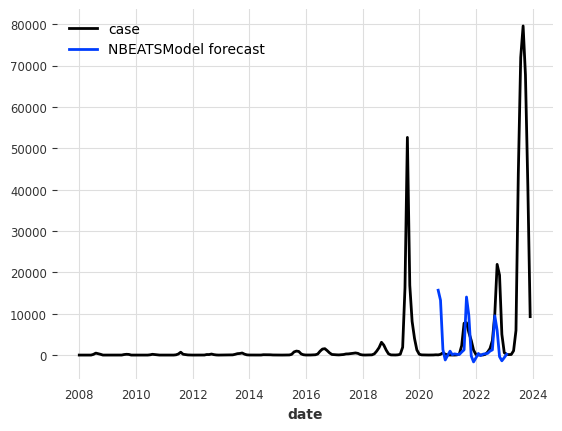

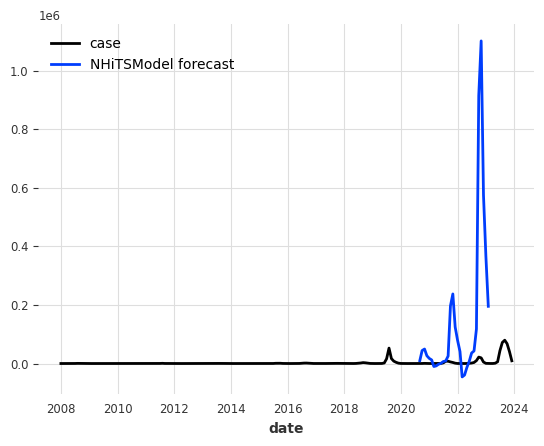

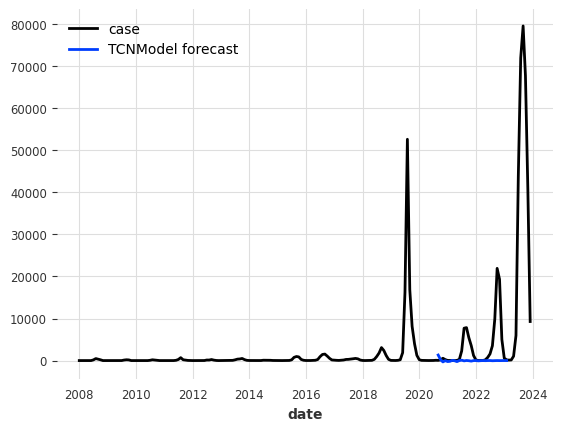

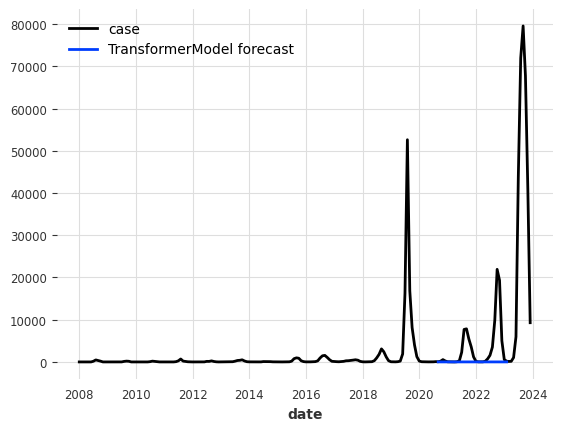

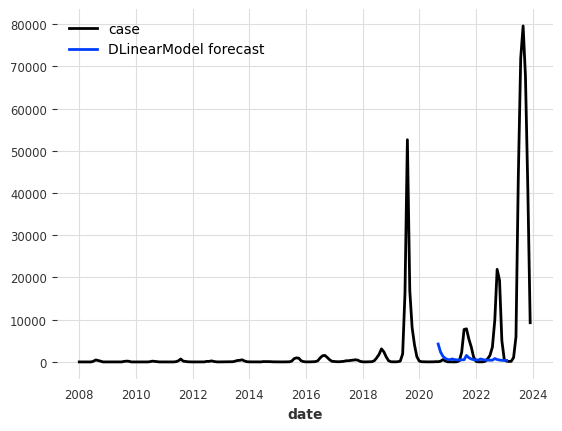

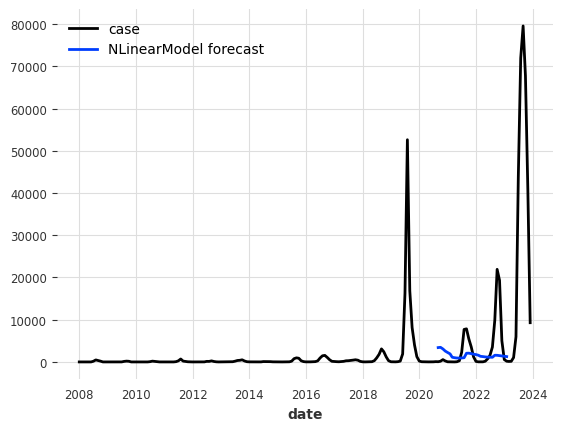

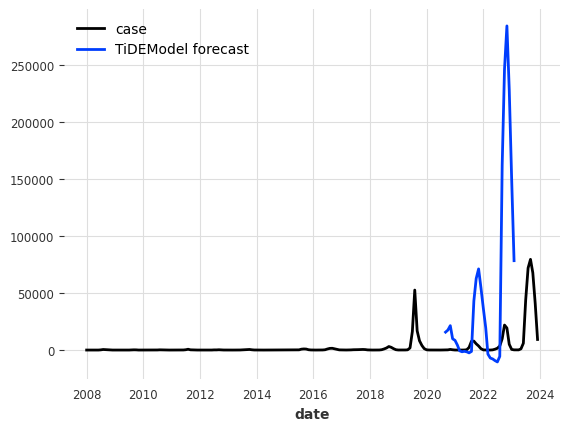

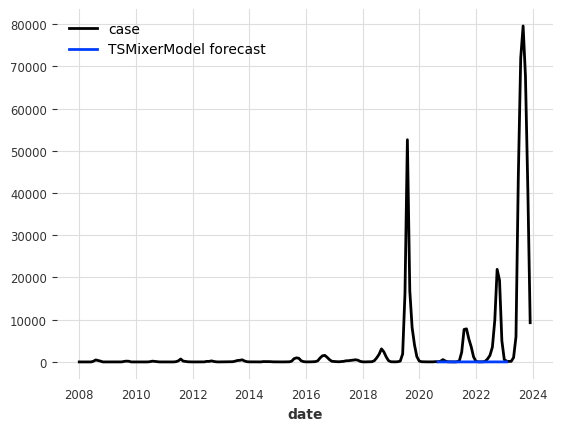

In [12]:
## NBEATSModel
pred_NBEATSModel = NBEATSModel(input_chunk_length=12, output_chunk_length=6, activation='LeakyReLU', n_epochs=10, pl_trainer_kwargs={"accelerator": "gpu", "devices": [0]}).fit(target).predict(horizon)
plt.figure()
series['case'].plot()
pred_NBEATSModel['case'].plot(label="NBEATSModel forecast", low_quantile=0.10, high_quantile=0.90)
plt.legend()

## NHiTSModel
pred_NHiTSModel = NHiTSModel(input_chunk_length=12, output_chunk_length=6, num_blocks=2, n_epochs=10, pl_trainer_kwargs={"accelerator": "gpu", "devices": [0]}).fit(target).predict(horizon)
plt.figure()
series['case'].plot()
pred_NHiTSModel['case'].plot(label="NHiTSModel forecast", low_quantile=0.10, high_quantile=0.90)
plt.legend()

## TCNModel
pred_TCNModel = TCNModel(input_chunk_length=12, output_chunk_length=6, n_epochs=10, pl_trainer_kwargs={"accelerator": "gpu", "devices": [0]}).fit(target).predict(horizon)
plt.figure()
series['case'].plot()
pred_TCNModel['case'].plot(label="TCNModel forecast", low_quantile=0.10, high_quantile=0.90)
plt.legend()

## TransformerModel
pred_TransformerModel = TransformerModel(input_chunk_length=12, output_chunk_length=6, n_epochs=10, pl_trainer_kwargs={"accelerator": "gpu", "devices": [0]}).fit(target).predict(horizon)
plt.figure()
series['case'].plot()
pred_TransformerModel['case'].plot(label="TransformerModel forecast", low_quantile=0.10, high_quantile=0.90)
plt.legend()

## DLinearModel
target = train['case']
pred_DLinearModel = DLinearModel(input_chunk_length=12, output_chunk_length=6, n_epochs=10, pl_trainer_kwargs={"accelerator": "gpu", "devices": [0]}).fit(target).predict(horizon)
plt.figure()
series['case'].plot()
pred_DLinearModel['case'].plot(label="DLinearModel forecast", low_quantile=0.10, high_quantile=0.90)
plt.legend()

## NLinearModel
pred_NLinearModel = NLinearModel(input_chunk_length=12, output_chunk_length=6, n_epochs=10, pl_trainer_kwargs={"accelerator": "gpu", "devices": [0]}).fit(target).predict(horizon)
plt.figure()
series['case'].plot()
pred_NLinearModel['case'].plot(label="NLinearModel forecast", low_quantile=0.10, high_quantile=0.90)
plt.legend()

## TiDEModel
pred_TiDEModel = TiDEModel(input_chunk_length=12, output_chunk_length=6, n_epochs=10, pl_trainer_kwargs={"accelerator": "gpu", "devices": [0]}).fit(target).predict(horizon)
plt.figure()
series['case'].plot()
pred_TiDEModel['case'].plot(label="TiDEModel forecast", low_quantile=0.10, high_quantile=0.90)
plt.legend()

## TSMixerModel
pred_TSMixerModel = TSMixerModel(input_chunk_length=12, output_chunk_length=6, n_epochs=10, pl_trainer_kwargs={"accelerator": "gpu", "devices": [0]}).fit(target).predict(horizon)
plt.figure()
series['case'].plot()
pred_TSMixerModel['case'].plot(label="TSMixerModel forecast", low_quantile=0.10, high_quantile=0.90)
plt.legend()